<a href="https://colab.research.google.com/github/fatihozoral/DSA210-MARTI-PROJ/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
from google.colab import files
uploaded = files.upload()

Saving marti.xlsx to marti.xlsx


In [14]:
marti = pd.read_excel('marti.xlsx')

In [15]:
print(marti.head())

        Dates  Distance   Time   Price
0  14/09/2020  1.059 km   7 dk  6.12 ₺
1  12/09/2020     925 m   5 dk   4.5 ₺
2  12/09/2020  1.193 km   9 dk   6.7 ₺
3  10/02/2020  1.557 km  12 dk  9.07 ₺
4  19/09/2020  1.552 km   8 dk  6.71 ₺


In [20]:
print(marti.dtypes)
marti['Dates'] = pd.to_datetime(marti['Dates'], errors='coerce')
print(marti[marti['Dates'].isna()])
marti['Month'] = marti['Dates'].dt.month
marti['Year'] = marti['Dates'].dt.year


Dates       datetime64[ns]
Distance            object
Time                object
Price               object
dtype: object
    Dates Distance   Time    Price
108   NaT  1.916km   8 dk  9.48  ₺
306   NaT      NaN    NaN      NaN
316   NaT      NaN    NaN      NaN
354   NaT      NaN    NaN      NaN


## Scooter usage by month

<ipython-input-95-911065200e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = cleaned_data['Dates'].dt.month
<ipython-input-95-911065200e06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = cleaned_data['Dates'].dt.year


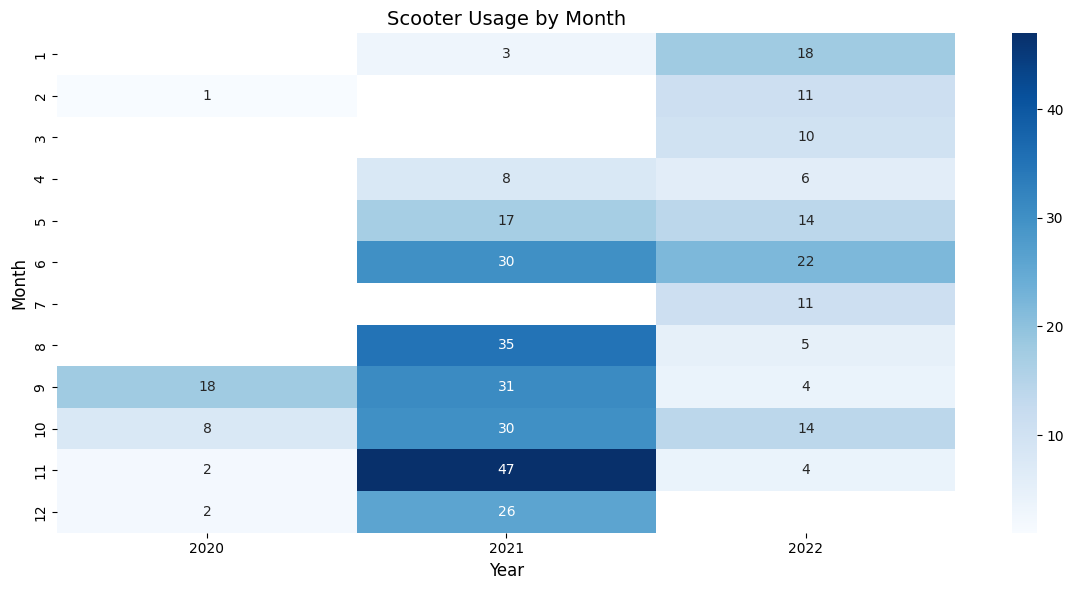

In [95]:
cleaned_data['Month'] = cleaned_data['Dates'].dt.month
cleaned_data['Year'] = cleaned_data['Dates'].dt.year

monthly_scooter_usage = cleaned_data.groupby(['Year', 'Month'])['Distance'].count().reset_index()

heatmap_data = monthly_scooter_usage.pivot(index='Month', columns='Year', values='Distance')

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Scooter Usage by Month", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.tight_layout()
plt.show()


## Average monthly earned time

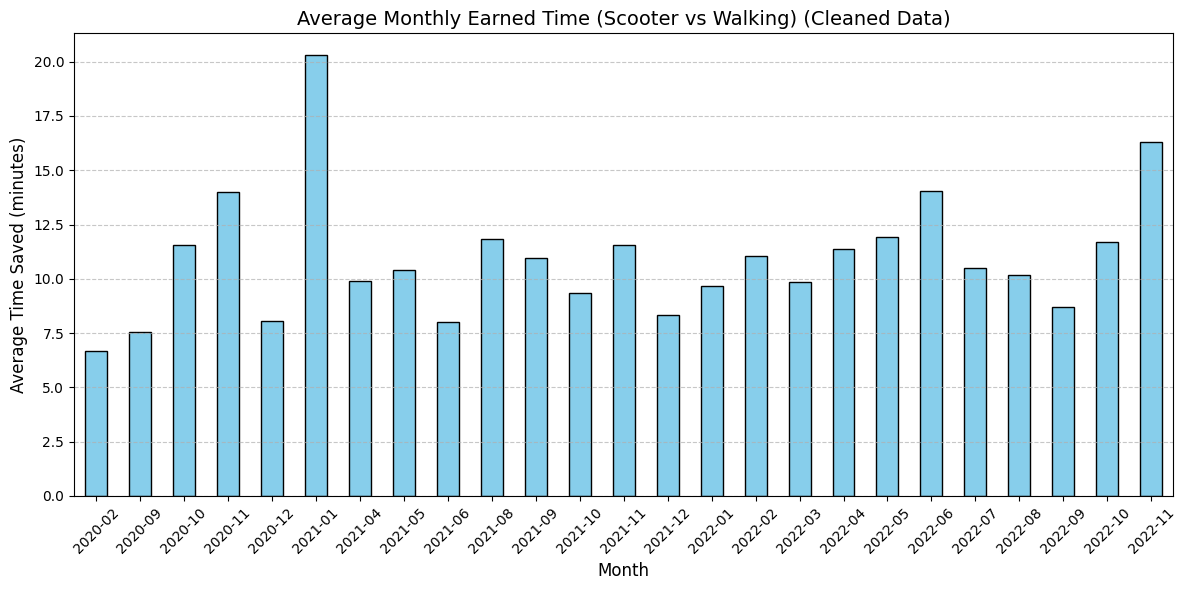

In [96]:
sheet_data['Dates'] = pd.to_datetime(sheet_data['Dates'], dayfirst=True, errors='coerce')

sheet_data = sheet_data.dropna(subset=['Dates'])

cleaned_data = sheet_data[sheet_data['Time_Saved'] >= 0]

monthly_time_saved = cleaned_data.groupby(cleaned_data['Dates'].dt.to_period('M'))['Time_Saved'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_time_saved.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Monthly Earned Time (Scooter vs Walking) (Cleaned Data)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Time Saved (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Average daily earned time

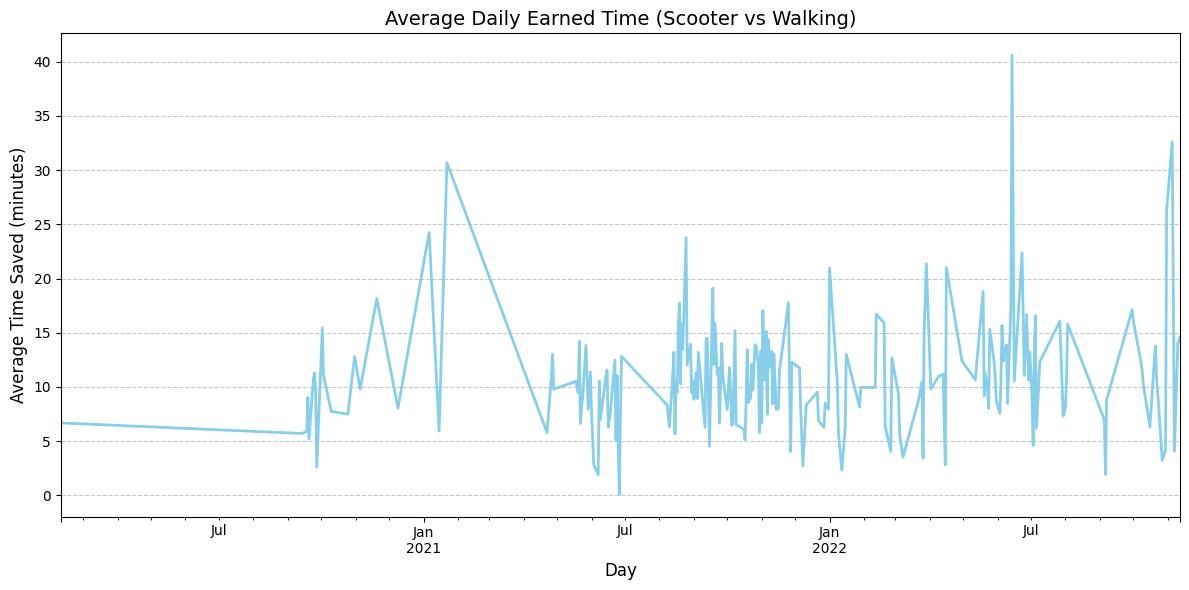

In [58]:
daily_time_saved = cleaned_data.groupby(cleaned_data['Dates'].dt.to_period('D'))['Time_Saved'].mean()

plt.figure(figsize=(12, 6))
daily_time_saved.plot(kind='line', color='skyblue', linewidth=2)
plt.title('Average Daily Earned Time (Scooter vs Walking)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Time Saved (minutes)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cost per kilometer per month

<ipython-input-97-6f64285fb7c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Price'] = (
<ipython-input-97-6f64285fb7c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cost_per_km'] = cleaned_data['Price'] / cleaned_data['Distance']


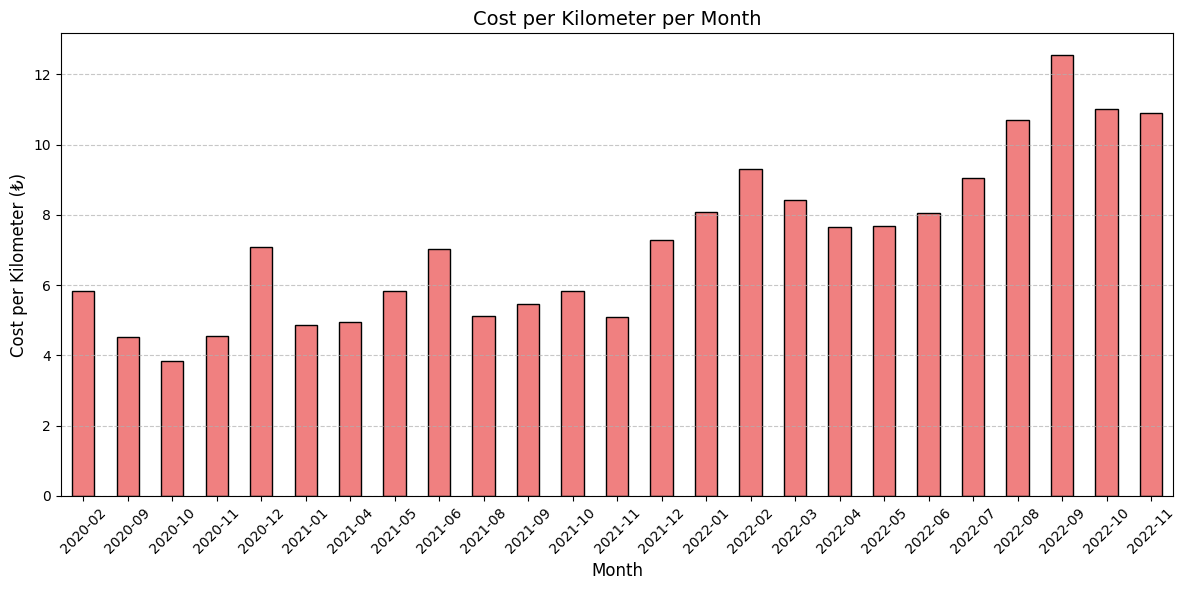

In [97]:
cleaned_data['Price'] = (
    cleaned_data['Price']
    .str.replace('[^0-9.,]', '', regex=True)
    .str.replace(',', '.').astype(float)
)

cleaned_data['Cost_per_km'] = cleaned_data['Price'] / cleaned_data['Distance']

monthly_cost_per_km = cleaned_data.groupby(cleaned_data['Dates'].dt.to_period('M'))['Cost_per_km'].mean()

plt.figure(figsize=(12, 6))
monthly_cost_per_km.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Cost per Kilometer per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cost per Kilometer (₺)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cost Per Kilometer Based on Distance

<ipython-input-98-591a3cb4d797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cost_per_km'] = cleaned_data['Price'] / cleaned_data['Distance']


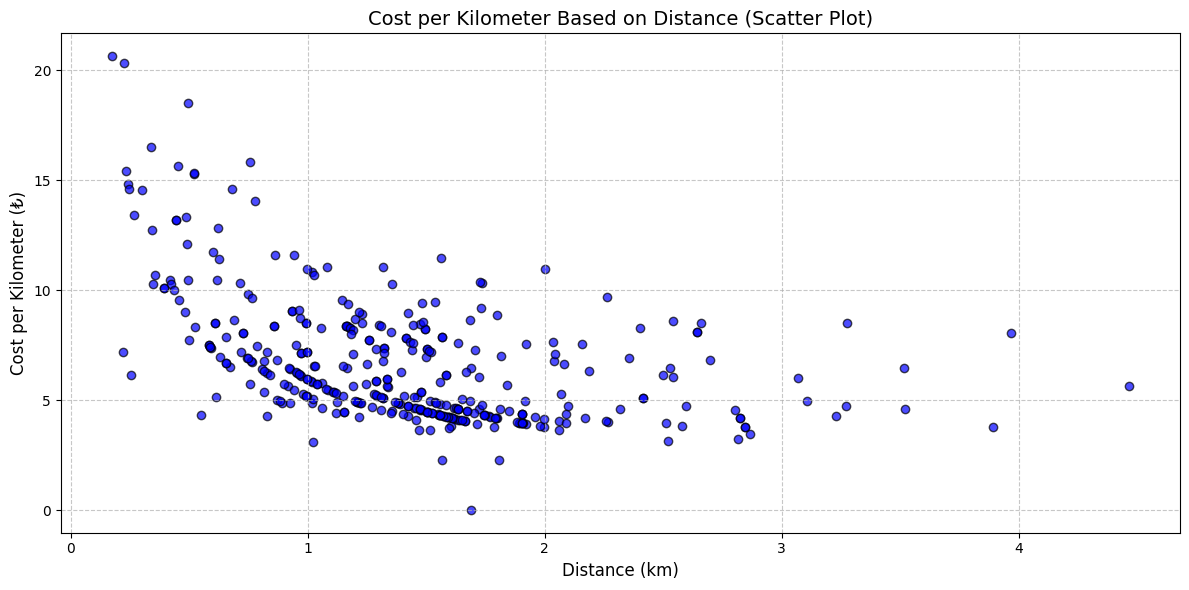

In [98]:
cleaned_data['Cost_per_km'] = cleaned_data['Price'] / cleaned_data['Distance']

plt.figure(figsize=(12, 6))
plt.scatter(cleaned_data['Distance'], cleaned_data['Cost_per_km'], alpha=0.7, color='blue', edgecolor='black')
plt.title('Cost per Kilometer Based on Distance (Scatter Plot)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Cost per Kilometer (₺)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Cost Per Minute

<ipython-input-99-1218d01e15aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cost_per_minute'] = cleaned_data['Price'] / cleaned_data['Time']


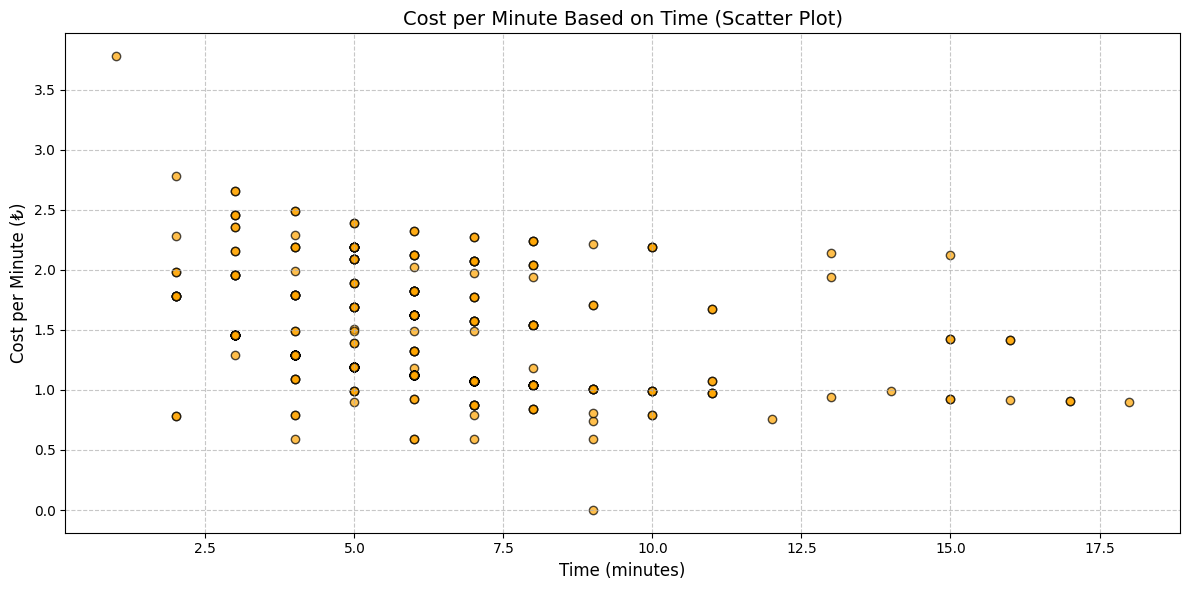

In [99]:
cleaned_data['Cost_per_minute'] = cleaned_data['Price'] / cleaned_data['Time']

plt.figure(figsize=(12, 6))
plt.scatter(cleaned_data['Time'], cleaned_data['Cost_per_minute'], alpha=0.7, color='orange', edgecolor='black')
plt.title('Cost per Minute Based on Time (Scatter Plot)', fontsize=14)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Cost per Minute (₺)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cost Per Minute by Duration

<ipython-input-100-b817aa649d9c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_per_minute_by_duration = cleaned_data.groupby(duration_bins)['Cost_per_minute'].mean()


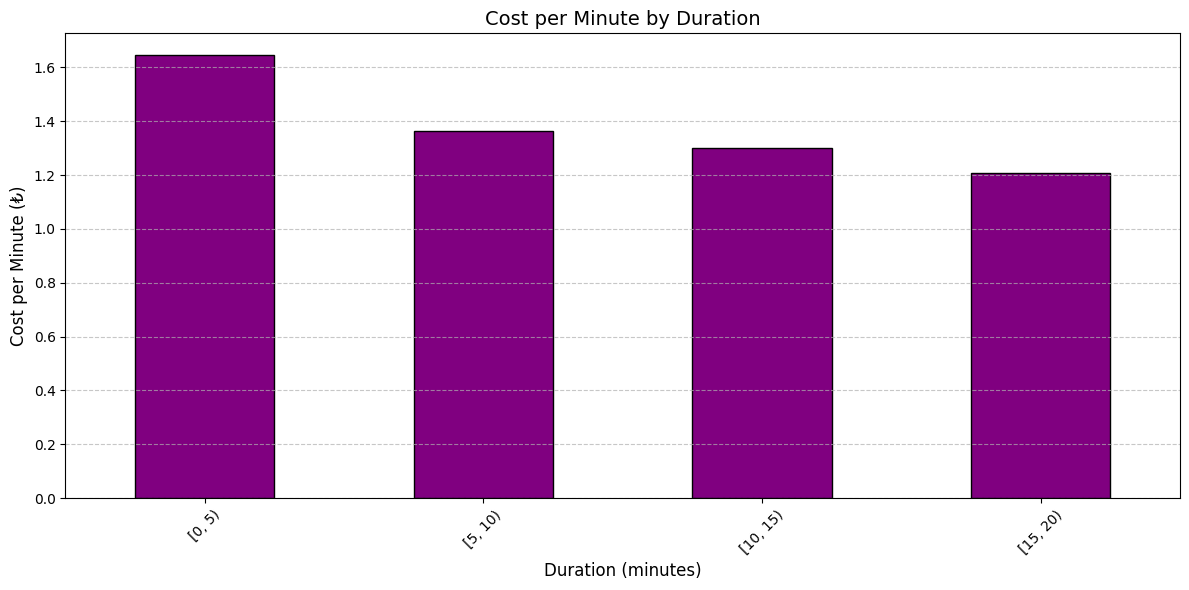

In [100]:
duration_bins = pd.cut(cleaned_data['Time'], bins=[0, 5, 10, 15, 20], right=False)
cost_per_minute_by_duration = cleaned_data.groupby(duration_bins)['Cost_per_minute'].mean()

plt.figure(figsize=(12, 6))
cost_per_minute_by_duration.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Cost per Minute by Duration', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Cost per Minute (₺)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Average Cost Per Kilometer and Per Minute by Distance Ranges

<ipython-input-101-c7d3141e1666>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Mesafe Aralığı'] = pd.cut(
<ipython-input-101-c7d3141e1666>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_cost_data = cleaned_data.groupby('Mesafe Aralığı').agg({


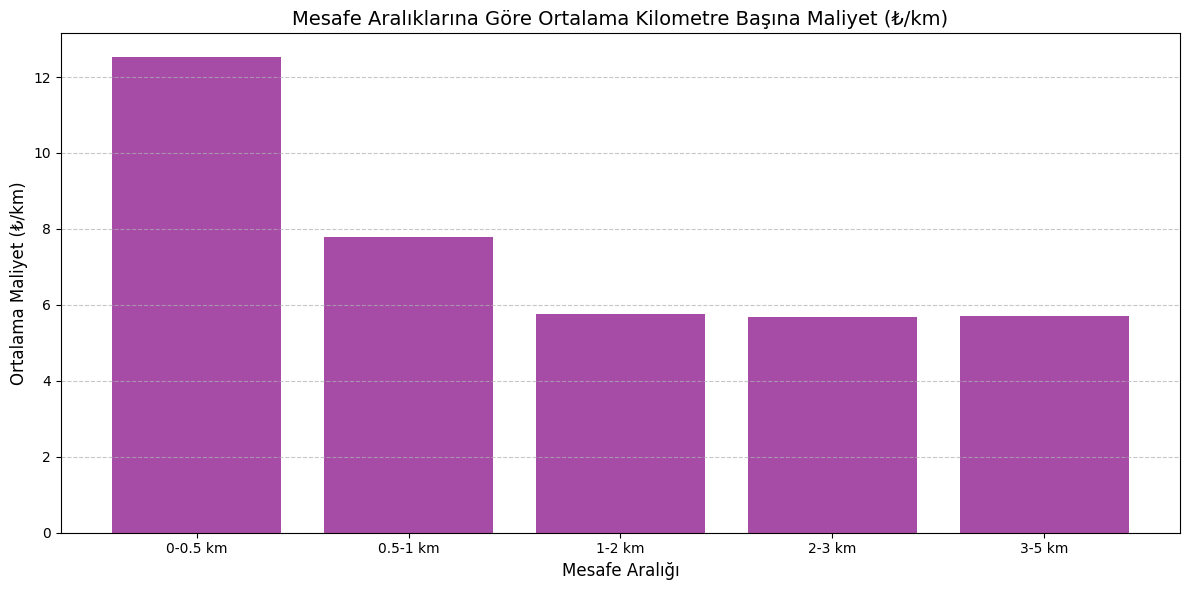

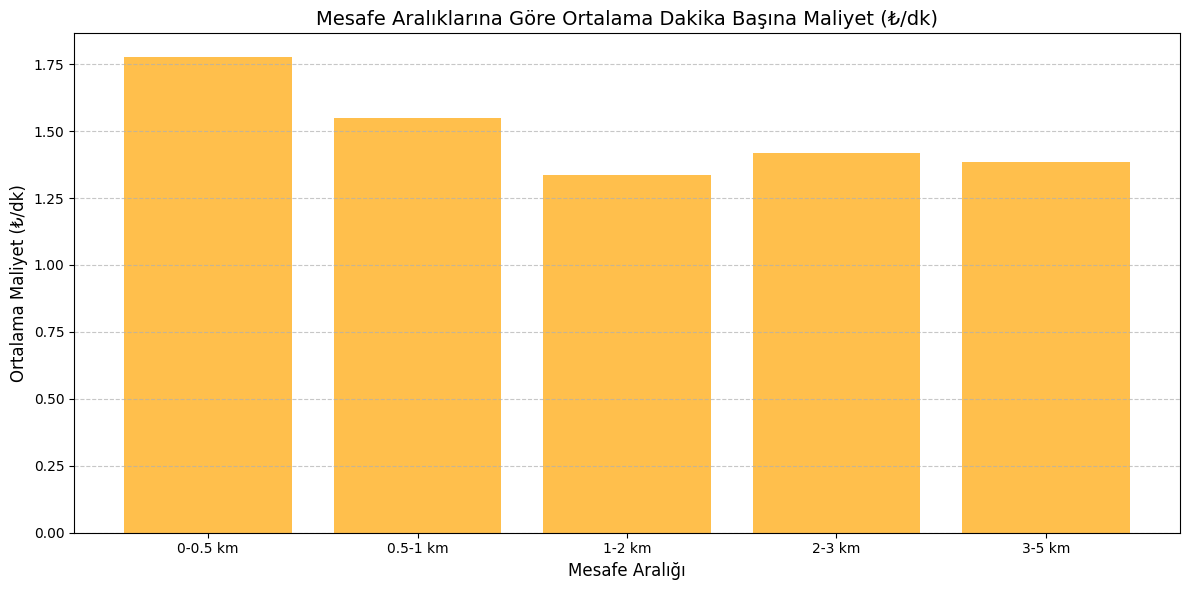

In [101]:
if 'Mesafe Aralığı' not in cleaned_data.columns:
    cleaned_data['Mesafe Aralığı'] = pd.cut(
        cleaned_data['Distance'],
        bins=[0, 0.5, 1, 2, 3, 5],
        labels=['0-0.5 km', '0.5-1 km', '1-2 km', '2-3 km', '3-5 km'],
        include_lowest=True
    )

grouped_cost_data = cleaned_data.groupby('Mesafe Aralığı').agg({
    'Cost_per_km': 'mean',
    'Cost_per_minute': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped_cost_data['Mesafe Aralığı'], grouped_cost_data['Cost_per_km'], color='purple', alpha=0.7)
plt.title("Mesafe Aralıklarına Göre Ortalama Kilometre Başına Maliyet (₺/km)", fontsize=14)
plt.xlabel("Mesafe Aralığı", fontsize=12)
plt.ylabel("Ortalama Maliyet (₺/km)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(grouped_cost_data['Mesafe Aralığı'], grouped_cost_data['Cost_per_minute'], color='orange', alpha=0.7)
plt.title("Mesafe Aralıklarına Göre Ortalama Dakika Başına Maliyet (₺/dk)", fontsize=14)
plt.xlabel("Mesafe Aralığı", fontsize=12)
plt.ylabel("Ortalama Maliyet (₺/dk)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Total Daily Time Savings

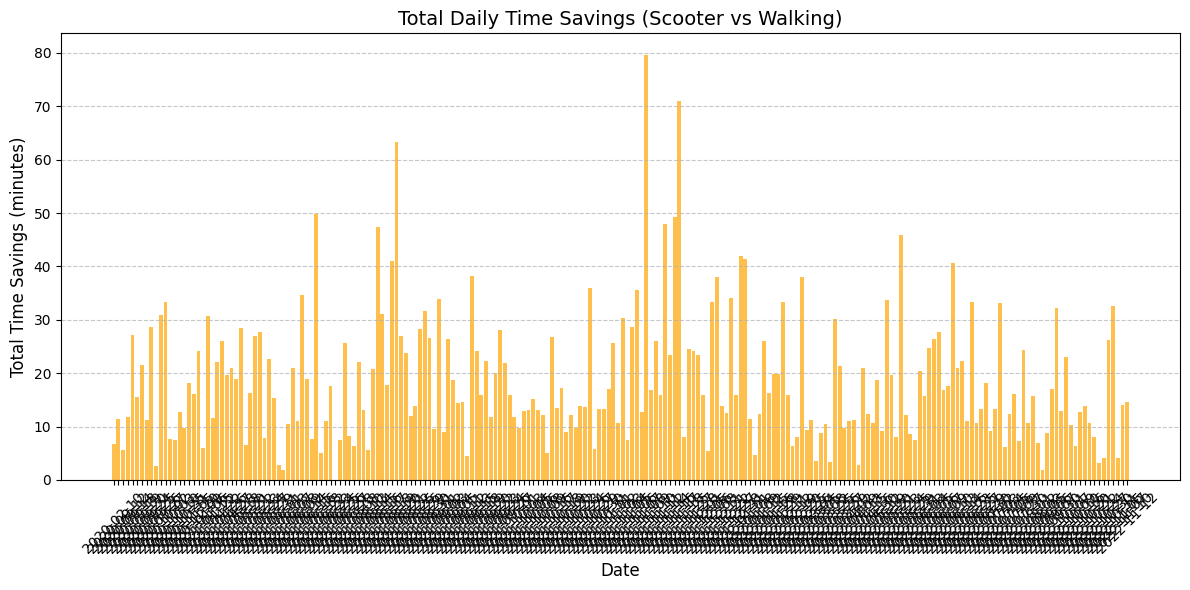

In [102]:
daily_time_savings = cleaned_data.groupby(cleaned_data['Dates'].dt.to_period('D'))['Time_Saved'].sum()

plt.figure(figsize=(12, 6))
plt.bar(daily_time_savings.index.astype(str), daily_time_savings.values, color='orange', alpha=0.7)
plt.title("Total Daily Time Savings (Scooter vs Walking)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Time Savings (minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Daily total cost

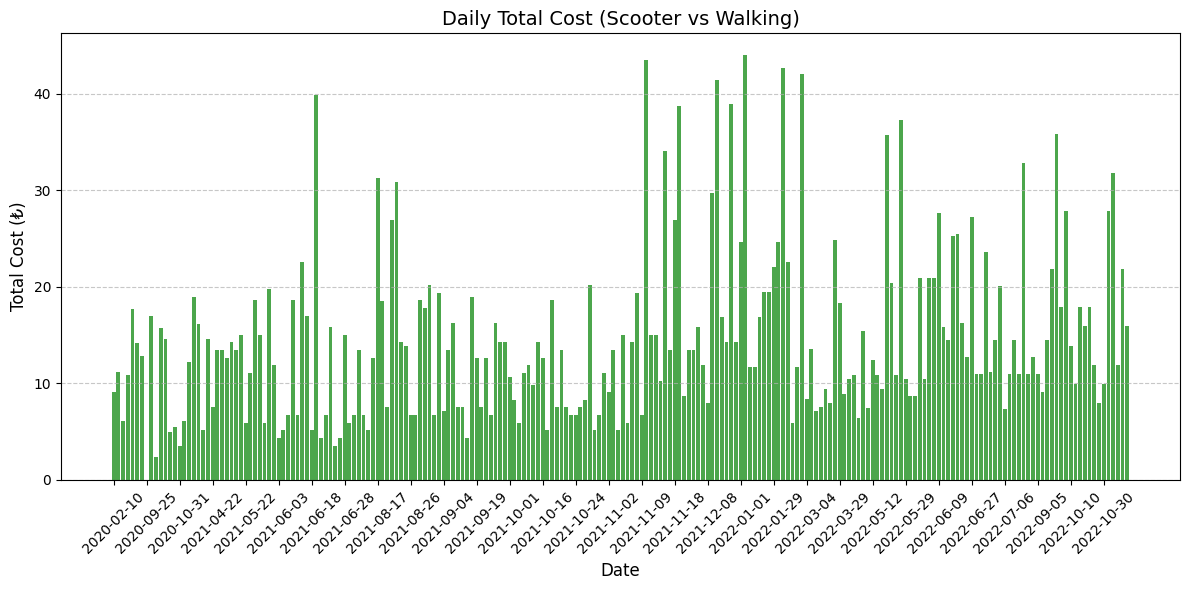

In [103]:
daily_total_cost = cleaned_data.groupby(cleaned_data['Dates'].dt.to_period('D'))['Price'].sum()

plt.figure(figsize=(12, 6))
plt.bar(daily_total_cost.index.astype(str), daily_total_cost.values, color='green', alpha=0.7)
plt.title("Daily Total Cost (Scooter vs Walking)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Cost (₺)", fontsize=12)

plt.xticks(ticks=range(0, len(daily_total_cost), 7), labels=daily_total_cost.index.astype(str)[::7], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Time saved vs Total cost

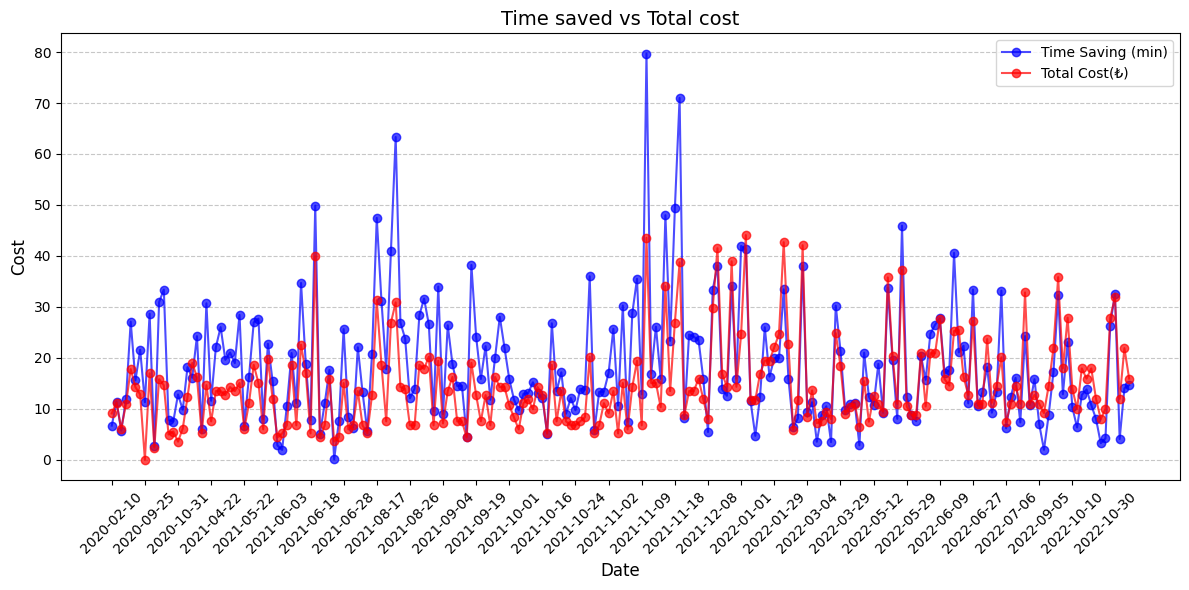

In [107]:
plt.figure(figsize=(12, 6))

plt.plot(daily_time_savings.index.astype(str), daily_time_savings.values, color='blue', marker='o', label="Time Saving (min)", alpha=0.7)

plt.plot(daily_total_cost.index.astype(str), daily_total_cost.values, color='red', marker='o', label="Total Cost(₺)", alpha=0.7)

plt.title("Time saved vs Total cost", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.xticks(ticks=range(0, len(daily_time_savings), 7), labels=daily_time_savings.index.astype(str)[::7], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cost per Time Saved by Distance

<ipython-input-105-0169218ba3cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cost_per_time_saved'] = cleaned_data['Price'] / cleaned_data['Time_Saved']
<ipython-input-105-0169218ba3cd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_per_time_saved_by_distance = cleaned_data.groupby('Mesafe Aralığı')['Cost_per_time_saved'].mean()


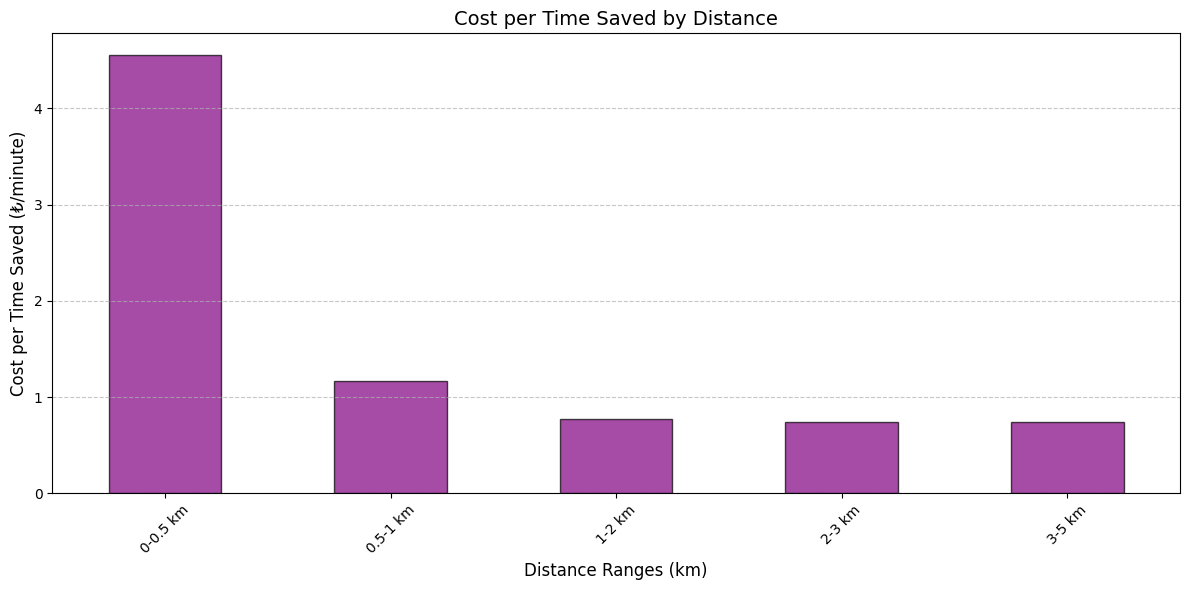

In [105]:
cleaned_data['Cost_per_time_saved'] = cleaned_data['Price'] / cleaned_data['Time_Saved']

cost_per_time_saved_by_distance = cleaned_data.groupby('Mesafe Aralığı')['Cost_per_time_saved'].mean()

plt.figure(figsize=(12, 6))
cost_per_time_saved_by_distance.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black')
plt.title("Cost per Time Saved by Distance", fontsize=14)
plt.xlabel("Distance Ranges (km)", fontsize=12)
plt.ylabel("Cost per Time Saved (₺/minute)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Time Required to Walk Total Distance Traveled by Scooter

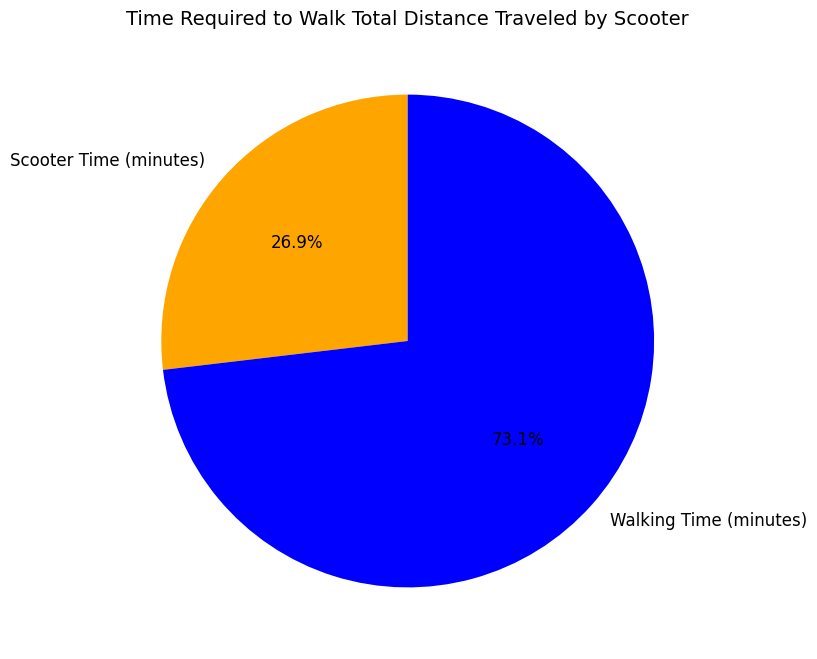

In [106]:
walking_speed = 5

total_distance_traveled = cleaned_data['Distance'].sum()

time_required_to_walk = (total_distance_traveled / walking_speed) * 60

time_data = [cleaned_data['Time'].sum(), time_required_to_walk]
labels = ['Scooter Time (minutes)', 'Walking Time (minutes)']
colors = ['orange', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(time_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title("Time Required to Walk Total Distance Traveled by Scooter", fontsize=14)
plt.show()
